In [1]:
import keras
from keras.datasets import mnist
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from sklearn import metrics
%matplotlib inline
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
from keras.callbacks import History

Using TensorFlow backend.


In [2]:
# Load the MNIST dataset
(x_train, y_train) , (x_test, y_test) = mnist.load_data()

# Normalizing the input
x_train = x_train.astype('float32')
x_train/=255

x_test = x_test.astype('float32')
x_test/=255

In [3]:
print('X_train shape', x_train.shape)
print('X_test shape', x_test.shape)
print('y_train shape', y_train.shape)
print('y_test shape', y_test.shape)

X_train shape (60000, 28, 28)
X_test shape (10000, 28, 28)
y_train shape (60000,)
y_test shape (10000,)


In [4]:
# Reserve 10,000 samples for validation from training sample
val_img = x_train[-10000:]
val_label = y_train[-10000:]

# Remaining training sample (#50,000)
x_train = x_train[:-10000]
y_train = y_train[:-10000]


In [5]:
# Creating a list of 1000 training images with 100 images per digit
data= dict()
data = {i: [] for i in range(10)}
train_img1000 = list()
train_lbl1000 = list()

for i in range(len(x_train)):
    data[y_train[i]].append(x_train[i])

for i in range(len(data)):
    for j in range(100):
        train_img1000.append(data[i][j])
        train_lbl1000.append(i)

train_img1000 = np.asarray(train_img1000)
train_lbl1000 = np.asarray(train_lbl1000)

In [6]:
print('val_img shape', val_img.shape)
print('val_label shape', val_label.shape)
print('x_test shape', x_test.shape)
print('y_test shape', y_test.shape)
print('x_train shape', x_train.shape)
print('y_train shape', y_train.shape)
print('train_img1000 shape', train_img1000.shape)
print('train_lbl1000 shape', train_lbl1000.shape)

val_img shape (10000, 28, 28)
val_label shape (10000,)
x_test shape (10000, 28, 28)
y_test shape (10000,)
x_train shape (50000, 28, 28)
y_train shape (50000,)
train_img1000 shape (1000, 28, 28)
train_lbl1000 shape (1000,)


# Task 1

### Softmax function:
The softmax function may be used as an output layer's activation function. It takes vector of k real numbers as an input, and normalizes it into a probability distribution consisting of k probabilities directly proportional to the exponentials of the input numbers.\
Thus, the softmax output can be written in the below form,\
$$p_k = \dfrac{e^{f_k}}{\sum_{j} e^{f_j}} \; \; \; \; \; \; \; \rightarrow (1)$$
and the negative log likelihood can be written as,
$$L_i = -log(p_{y_{i}}) \; \; \; \; \; \; \; \rightarrow (2)$$

While performing back-propagation, we first compute the loss changes w.r.t the output of the network $(f_k)$.\
Because $L$ is dependent on $p_{k}$, and $P$ is dependent on $f_{k}$, using the chain rule, we have

$$\dfrac{\partial L_i}{\partial f_k} = \dfrac{\partial L_i}{\partial p_k} \dfrac{\partial p_k}{\partial f_k} \; \; \; \; \; \; \; \rightarrow (3)$$

We get,\
$$\dfrac{\partial L_i}{\partial p_k}= \frac{-1}{p_k} \; \; \; \; \; \; \; \rightarrow (4)$$
and,\
$$\dfrac{\partial p_k}{\partial f_k} = \dfrac{\partial}{\partial f_k} \left(\dfrac{e^{f_k}}{\sum_{j} e^{f_j}}\right)$$
$$\dfrac{\partial p_k}{\partial f_k} = \dfrac{e^{f_k}(\Sigma - e^{f_k})}{\Sigma^2}$$
$$\dfrac{\partial p_k}{\partial f_k} = \dfrac{e^{f_k}}{\Sigma} \dfrac{\Sigma - e^{f_k}}{\Sigma}$$ 
$$\dfrac{\partial p_k}{\partial f_k} = p_k * (1-p_k) \; \; \; \; \; \; \; \rightarrow (5)$$

By combining eqn(4) & (5) and substituting in eqn(3), we get\
$$\dfrac{\partial L_i}{\partial f_k} = -\dfrac{1}{p_k} (p_k * (1-p_k))$$
$$\dfrac{\partial L_i}{\partial f_k} = (p_k - 1)$$

Thus, from the above equation, we can see that the negative log likelihood is differentiated w.r.t the softmax output layer and maximization of it depends on the softmax output nodes.<br><br>


Maximum a posterior estimation is $\text{arg max}_{\vec w} p(\mathcal D; \vec w)p(\vec w)$ where $p(\vec w)$ are prior distribution of synaptic weights.

Categorical distribution $p(t_k|x;w)=y_k(x;w)$ with 1-hot coding $t_k\in\{0,1\}$ and $\sum_k t_k=1$ corresponds to,
$$J(w)= -\log p(\mathcal D;w) =-\sum_n\sum_k t_{n,k}\log y_k(x_n;w)$$

In the L2 Regularization, weight distrbution is the one which minimizes the below criterian function using L2 Regularization,
$$C = \underbrace{-{1\over n}\sum_{j} [y_j\log a_j^L + (1-y_j) \log(1-a_j^L)]}_{C_0} + {\lambda\over 2 n}\sum_w w^2$$


############################### End of Task 1 ###########################################

# Task 2 (a)

In [25]:
# Build the model1. (NN with 1 hidden layer of 30 sigmoid nodes)

def model1():
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(30, activation=tf.sigmoid))
    model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

    # Compile the model
    model.compile(
    optimizer=tf.keras.optimizers.Adam(lr=0.1),
    loss= 'sparse_categorical_crossentropy', 
    metrics=['accuracy'],)

    # Train the model on 1000 training images (train_img1000 & train_lbl1000) and validate on the validation data
    history = model.fit(train_img1000, train_lbl1000, validation_data= (val_img, val_label), epochs=30, batch_size=128, verbose=0, )

    # Evaluating the model on the original test data
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
    print()
    print('\n######### Test accuracy of model 1:', test_acc*100, '%')
    print('\n######### Testing Error on model 1:', (1-test_acc)*100, '%')
    print()

    # Plot the criterion function (Loss) graph
    plt.figure(figsize=[8,6])
    plt.plot(history.history['loss'],'r',linewidth=3.0)
    plt.plot(history.history['val_loss'],'b',linewidth=3.0)
    plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
    plt.xlabel('Epochs ',fontsize=16)
    plt.ylabel('Loss',fontsize=16)
    plt.title('Loss Curves',fontsize=16)

10000/1 - 0s - loss: 0.5057 - accuracy: 0.8662


######### Test accuracy of model 1: 86.61999702453613 %

######### Testing Error on model 1: 13.380002975463867 %



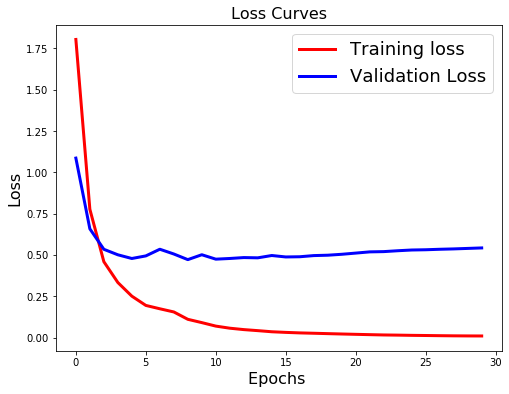

In [26]:
model1()

# Task 2 (b)

### NN with 2 hidden layer of 30 sigmoid nodes each

In [9]:
# Build the model2. (NN with 2 hidden layer of 30 sigmoid nodes each)

def model2():
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(30, activation=tf.sigmoid))
    model.add(tf.keras.layers.Dense(30, activation=tf.sigmoid))
    model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

    # Compile the model
    model.compile(
    optimizer=tf.keras.optimizers.Adam(lr=0.1),
    loss= 'sparse_categorical_crossentropy', 
    metrics=['accuracy'],)

    # Train the model on 1000 training images (train_img1000 & train_lbl1000) and validate on the validation data
    history = model.fit(train_img1000, train_lbl1000, validation_data= (val_img, val_label), epochs=30, batch_size=128, verbose=0, )

    # Evaluating the model on the original test data
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
    print()
    print('\n######### Test accuracy of model 2:', test_acc*100, '%')
    print('\n######### Testing Error on model 2:', (1-test_acc)*100, '%')
    print()

    # Plot the criterion function (Loss) graph
    plt.figure(figsize=[8,6])
    plt.plot(history.history['loss'],'r',linewidth=3.0)
    plt.plot(history.history['val_loss'],'b',linewidth=3.0)
    plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
    plt.xlabel('Epochs ',fontsize=16)
    plt.ylabel('Loss',fontsize=16)
    plt.title('Loss Curves',fontsize=16)

10000/1 - 0s - loss: 1.0974 - accuracy: 0.8195


######### Test accuracy of model 2: 81.95000290870667 %

######### Testing Error on model 2: 18.049997091293335 %



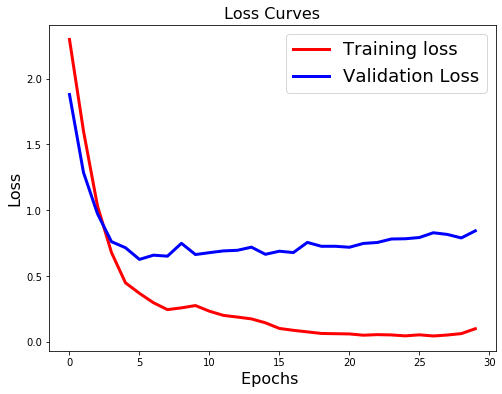

In [10]:
model2()

### NN with 3 hidden layer of 30 sigmoid nodes each

In [11]:
# Build the model3. (NN with 3 hidden layer of 30 sigmoid nodes each)

def model3():
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(30, activation=tf.sigmoid))
    model.add(tf.keras.layers.Dense(30, activation=tf.sigmoid))
    model.add(tf.keras.layers.Dense(30, activation=tf.sigmoid))
    model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

    # Compile the model
    model.compile(
    optimizer=tf.keras.optimizers.Adam(lr=0.1),
    loss= 'sparse_categorical_crossentropy', 
    metrics=['accuracy'],)

    # Train the model on 1000 training images (train_img1000 & train_lbl1000) and validate on the validation data
    history = model.fit(train_img1000, train_lbl1000, validation_data= (val_img, val_label), epochs=30, batch_size=128, verbose=0, )

    # Evaluating the model on the original test data
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
    print()
    print('\n######### Test accuracy of model 3:', test_acc*100, '%')
    print()

    # Plot the criterion function (Loss) graph
    plt.figure(figsize=[8,6])
    plt.plot(history.history['loss'],'r',linewidth=3.0)
    plt.plot(history.history['val_loss'],'b',linewidth=3.0)
    plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
    plt.xlabel('Epochs ',fontsize=16)
    plt.ylabel('Loss',fontsize=16)
    plt.title('Loss Curves',fontsize=16)

10000/1 - 0s - loss: 1.8047 - accuracy: 0.2704


######### Test accuracy of model 3: 27.039998769760132 %



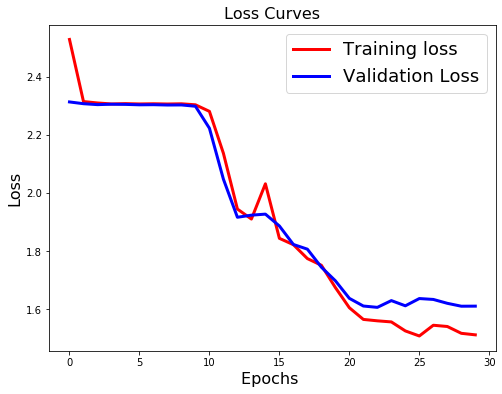

In [12]:
model3()

### NN with 1 hidden layer of 30 sigmoid nodes with L2 Regularization

In [13]:
# Build the model4. (NN with 1 hidden layer of 30 sigmoid nodes with L2 Regularization)

def model4():
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(30, activation=tf.sigmoid, kernel_regularizer=tf.keras.regularizers.l2(5)))
    model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

    # Compile the model
    model.compile(
    optimizer=tf.keras.optimizers.Adam(lr=0.1),
    loss= 'sparse_categorical_crossentropy', 
    metrics=['accuracy'],)

    # Train the model on 1000 training images (train_img1000 & train_lbl1000) and validate on the validation data
    history = model.fit(train_img1000, train_lbl1000, validation_data= (val_img, val_label), epochs=30, batch_size=128, verbose=0, )

    # Evaluating the model on the original test data
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
    print()
    print('\n######### Test accuracy of model 4:', test_acc*100, '%')
    print()

    # Plot the criterion function (Loss) graph
    plt.figure(figsize=[8,6])
    plt.plot(history.history['loss'],'r',linewidth=3.0)
    plt.plot(history.history['val_loss'],'b',linewidth=3.0)
    plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
    plt.xlabel('Epochs ',fontsize=16)
    plt.ylabel('Loss',fontsize=16)
    plt.title('Loss Curves',fontsize=16)

10000/1 - 0s - loss: 2.3802 - accuracy: 0.1009


######### Test accuracy of model 4: 10.090000182390213 %



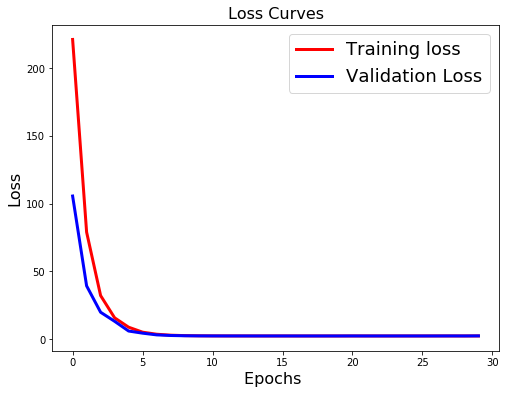

In [14]:
model4()

### NN with 2 hidden layer of 30 sigmoid nodes each with L2 Regularization

In [15]:
# Build the model5. (NN with 2 hidden layer of 30 sigmoid nodes each with L2 Regularization)

def model5():
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(30, activation=tf.sigmoid, kernel_regularizer=tf.keras.regularizers.l2(5)))
    model.add(tf.keras.layers.Dense(30, activation=tf.sigmoid, kernel_regularizer=tf.keras.regularizers.l2(5)))
    model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

    # Compile the model
    model.compile(
    optimizer=tf.keras.optimizers.Adam(lr=0.1),
    loss= 'sparse_categorical_crossentropy', 
    metrics=['accuracy'],)

    # Train the model on 1000 training images (train_img1000 & train_lbl1000) and validate on the validation data
    history = model.fit(train_img1000, train_lbl1000, validation_data= (val_img, val_label), epochs=30, batch_size=128, verbose=0, )

    # Evaluating the model on the original test data
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
    print()
    print('\n######### Test accuracy of model 5:', test_acc*100, '%')
    print()

    # Plot the criterion function (Loss) graph
    plt.figure(figsize=[8,6])
    plt.plot(history.history['loss'],'r',linewidth=3.0)
    plt.plot(history.history['val_loss'],'b',linewidth=3.0)
    plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
    plt.xlabel('Epochs ',fontsize=16)
    plt.ylabel('Loss',fontsize=16)
    plt.title('Loss Curves',fontsize=16)

10000/1 - 0s - loss: 2.3070 - accuracy: 0.0892


######### Test accuracy of model 5: 8.919999748468399 %



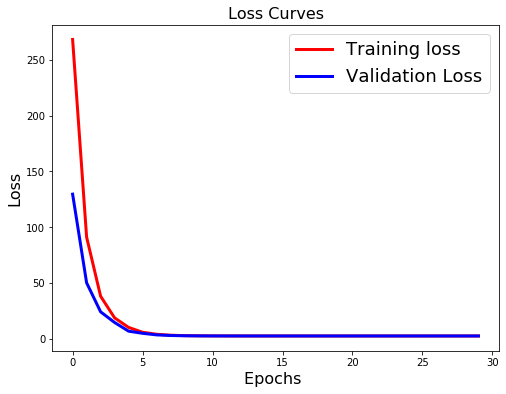

In [16]:
model5()

### NN with 3 hidden layer of 30 sigmoid nodes each with L2 Regularization

In [17]:
# Build the model6. (NN with 3 hidden layer of 30 sigmoid nodes each with L2 Regularization)

def model6():
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(30, activation=tf.sigmoid, kernel_regularizer=tf.keras.regularizers.l2(5)))
    model.add(tf.keras.layers.Dense(30, activation=tf.sigmoid, kernel_regularizer=tf.keras.regularizers.l2(5)))
    model.add(tf.keras.layers.Dense(30, activation=tf.sigmoid, kernel_regularizer=tf.keras.regularizers.l2(5)))
    model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

    # Compile the model
    model.compile(
    optimizer=tf.keras.optimizers.Adam(lr=0.1),
    loss= 'sparse_categorical_crossentropy', 
    metrics=['accuracy'],)

    # Train the model on 1000 training images (train_img1000 & train_lbl1000) and validate on the validation data
    history = model.fit(train_img1000, train_lbl1000, validation_data= (val_img, val_label), epochs=30, batch_size=128, verbose=0, )

    # Evaluating the model on the original test data
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
    print()
    print('\n######### Test accuracy of model 6:', test_acc*100, '%')
    #return history
    print()

    # Plot the criterion function (Loss) graph
    plt.figure(figsize=[8,6])
    plt.plot(history.history['loss'],'r',linewidth=3.0)
    plt.plot(history.history['val_loss'],'b',linewidth=3.0)
    plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
    plt.xlabel('Epochs ',fontsize=16)
    plt.ylabel('Loss',fontsize=16)
    plt.title('Loss Curves',fontsize=16)

10000/1 - 0s - loss: 2.3076 - accuracy: 0.0980


######### Test accuracy of model 6: 9.799999743700027 %



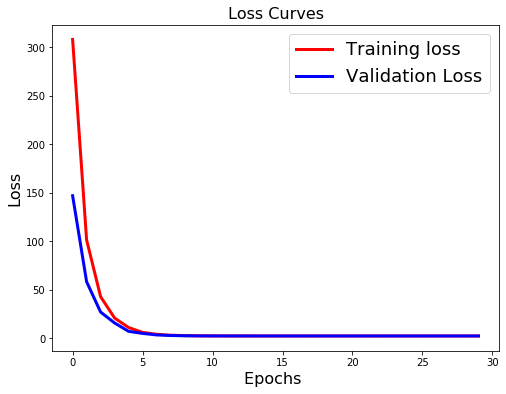

In [18]:
model6()

 ######################################## End of Task 2 (b) ####################################

# Task 2 (c)

### Convolution Neural Network (CNN)


In [19]:
# Normalizing the input
train_img1000 = train_img1000.reshape(train_img1000.shape[0], 28, 28, 1)
val_img= val_img.reshape(val_img.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

print('train_img1000 shape', train_img1000.shape)
print('val_img shape', val_img.shape)
print('x_test shape', x_test.shape)

train_img1000 shape (1000, 28, 28, 1)
val_img shape (10000, 28, 28, 1)
x_test shape (10000, 28, 28, 1)


In [20]:
print('val_img shape', val_img.shape)
print('val_label shape', val_label.shape)
print('x_test shape', x_test.shape)
print('y_test shape', y_test.shape)
print('x_train shape', x_train.shape)
print('y_train shape', y_train.shape)
print('train_img1000 shape', train_img1000.shape)
print('train_lbl1000 shape', train_lbl1000.shape)

val_img shape (10000, 28, 28, 1)
val_label shape (10000,)
x_test shape (10000, 28, 28, 1)
y_test shape (10000,)
x_train shape (50000, 28, 28)
y_train shape (50000,)
train_img1000 shape (1000, 28, 28, 1)
train_lbl1000 shape (1000,)



MNIST data BEFORE Image Augmentation:



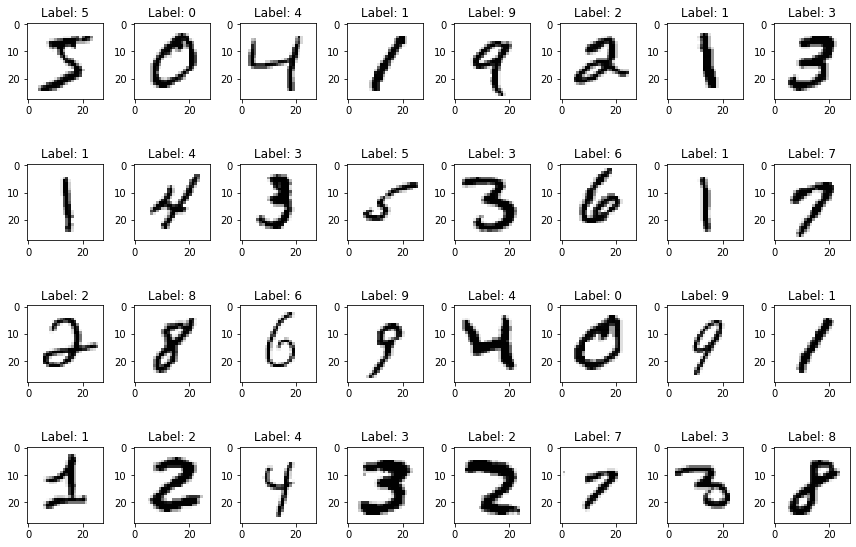


MNIST data AFTER Image Augmentation including rotation, pixels displacement, flips etc.:



c:\python37\lib\site-packages\keras_preprocessing\image\image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
c:\python37\lib\site-packages\keras_preprocessing\image\image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


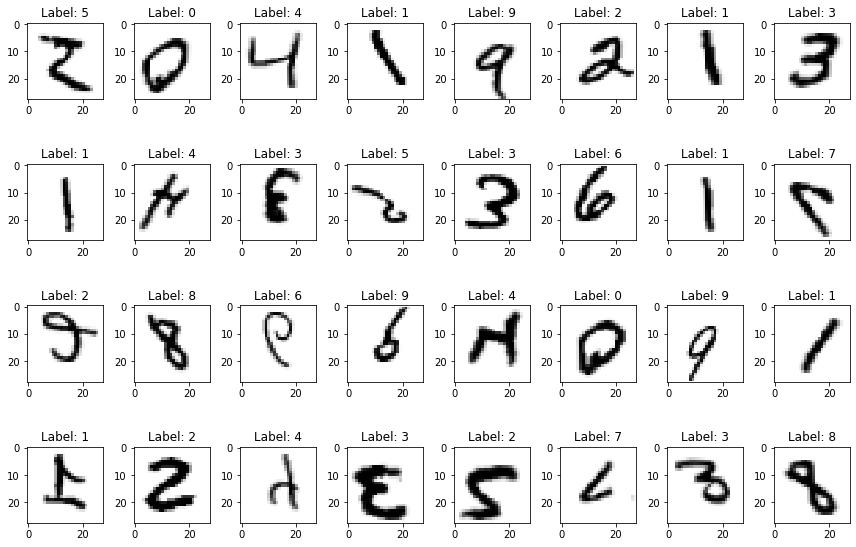

In [21]:
# Build a Conv NN for augmented MNIST data

model = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(32, kernel_size=(5,5), strides=(1,1), activation='relu', input_shape=(28,28,1)),
            tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
            tf.keras.layers.Conv2D(64, kernel_size=(5,5), activation='relu'),
            tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(1000, activation='relu'),
            tf.keras.layers.Dense(10, activation='softmax')])

# Compile the CNN model
model.compile(
  optimizer=tf.keras.optimizers.Adam(lr=0.1),
  loss= 'sparse_categorical_crossentropy', 
  metrics=['accuracy'],)

# Perform image augmentation on MNIST data
datagen = ImageDataGenerator(
            rotation_range=3,       #degree rotation
            width_shift_range=3,    #pixel shift in the width
            height_shift_range=3,   #pixel shift in the width
            shear_range= 0.9,       #Shear angle in counter-clockwise direction in degrees
            horizontal_flip=True,   #Randomly flip inputs horizontally
            vertical_flip= True,    #Randomly flip inputs vertically
            featurewise_center=True,
            featurewise_std_normalization=True,
            rescale= 20)

############ Draw the original MNIST digits and after image augmentation for visual purpose ##########
# define number of rows & columns
num_row = 4
num_col = 8
num= num_row*num_col

print()
# plot MNIST digits before image augmentation
print('MNIST data BEFORE Image Augmentation:\n')

# plot original MNIST digit images
fig1, axes1 = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
     ax = axes1[i//num_col, i%num_col]
     ax.imshow(x_train[i], cmap='gray_r')
     ax.set_title('Label: {}'.format(y_train[i]))
plt.tight_layout()
plt.show()
print()


# plot MNIST digits after image augmentation
print('MNIST data AFTER Image Augmentation including rotation, pixels displacement, flips etc.:\n')
fig2, axes2 = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for X, Y in datagen.flow(x_train.reshape(x_train.shape[0], 28, 28, 1),y_train.reshape(y_train.shape[0], 1),batch_size=num,shuffle=False):
     for i in range(0, num):
          ax = axes2[i//num_col, i%num_col]
          ax.imshow(X[i].reshape(28,28), cmap='gray_r')
          ax.set_title('Label: {}'.format(int(Y[i])))
     break
plt.tight_layout()
plt.show()

In [22]:
# Train the model on 1000 training images (train_img1000 & train_lbl1000) and validate on the validation data
history = model.fit_generator(datagen.flow(train_img1000, train_lbl1000, batch_size=128),
                                      steps_per_epoch=len(train_img1000)/128,
                                      epochs=10,
                                      verbose=0,
                                      validation_data= (val_img, val_label))

# Evaluating the model on the original test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)


c:\python37\lib\site-packages\keras_preprocessing\image\image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
c:\python37\lib\site-packages\keras_preprocessing\image\image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
c:\python37\lib\site-packages\keras_preprocessing\image\image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
c:\python37\lib\site-packages\keras_preprocessing\image\image_data_generator.py:716: UserWarning: Thi

c:\python37\lib\site-packages\keras_preprocessing\image\image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
c:\python37\lib\site-packages\keras_preprocessing\image\image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
c:\python37\lib\site-packages\keras_preprocessing\image\image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
c:\python37\lib\site-packages\keras_preprocessing\image\image_data_generator.py:724: UserWarning: Thi

c:\python37\lib\site-packages\keras_preprocessing\image\image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
c:\python37\lib\site-packages\keras_preprocessing\image\image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
c:\python37\lib\site-packages\keras_preprocessing\image\image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
c:\python37\lib\site-packages\keras_preprocessing\image\image_data_generator.py:724: UserWarning: Thi

10000/1 - 5s - loss: 9789391.0072 - accuracy: 0.0980


In [23]:
print('Test Accuracy using Conv NN on MNIST augmented dataset:', test_acc*100, '%')
print('Testing error using Conv NN on MNIST augmented dataset:', (1-test_acc)*100, '%')

Test Accuracy using Conv NN on MNIST augmented dataset: 9.799999743700027 %
Testing error using Conv NN on MNIST augmented dataset: 90.20000025629997 %


             ############################ End of Task 2 (c) ####################################

References:\
[1] https://keras.io/preprocessing/image/ \
[2] https://www.tensorflow.org/tutorials/keras/classification\ \
[3] CS231n Convolutional Neural Networks for Visual Recognition

         ################################### End of Tasks #############################################